In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
pip install matplotlib

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/프로젝트 23 06/점포 추천 시각화 프로젝트/서울시 휴게음식점 인허가 정보 편의점 영업 최종본.csv', encoding = 'cp949')
print(data.head())

   개방자치단체코드                    관리번호       인허가일자  폐업일자       전화번호  소재지면적  \
0   3240000  3240000-104-2023-00028  2023-02-16   NaN        NaN    3.3   
1   3050000  3050000-104-2023-00039  2023-03-24   NaN        NaN    3.3   
2   3240000  3240000-104-2023-00052  2023-03-24   NaN        NaN    3.3   
3   3210000  3210000-104-2023-00076  2023-03-24   NaN  232748112    3.3   
4   3210000  3210000-104-2023-00075  2023-03-24   NaN        NaN    3.3   

                     지번주소           사업장명      좌표정보(X)      좌표정보(Y)  
0     서울특별시 강동구 천호동 335-8   세븐일레븐 천호이편한점  210880.8738  449088.3890  
1  서울특별시 동대문구 전농동 128-101  지에스25 (전농샛별점)  204444.3151  453284.2054  
2  서울특별시 강동구 암사동 452 진주빌딩       씨유 암사진주점  211936.1242  450260.9752  
3    서울특별시 서초구 반포동 612-55  세븐일레븐 반포서래마을점  199296.1350  443950.2368  
4  서울특별시 서초구 방배동 897-1 1층        씨유 내방역점  199448.5860  442829.2125  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = data.drop(labels=['관리번호','인허가일자','폐업일자'], axis=1)
print(data.head())

   개방자치단체코드       전화번호  소재지면적                    지번주소           사업장명  \
0   3240000        NaN    3.3     서울특별시 강동구 천호동 335-8   세븐일레븐 천호이편한점   
1   3050000        NaN    3.3  서울특별시 동대문구 전농동 128-101  지에스25 (전농샛별점)   
2   3240000        NaN    3.3  서울특별시 강동구 암사동 452 진주빌딩       씨유 암사진주점   
3   3210000  232748112    3.3    서울특별시 서초구 반포동 612-55  세븐일레븐 반포서래마을점   
4   3210000        NaN    3.3  서울특별시 서초구 방배동 897-1 1층        씨유 내방역점   

       좌표정보(X)      좌표정보(Y)  
0  210880.8738  449088.3890  
1  204444.3151  453284.2054  
2  211936.1242  450260.9752  
3  199296.1350  443950.2368  
4  199448.5860  442829.2125  


In [ ]:
import pyproj
df_map = data.copy()

In [ ]:
!pip install pyproj
import pyproj

def tm_to_lonlat(x, y):
  proj_1 = pyproj.Proj(init='epsg:2097')
  proj_2 = pyproj.Proj(init='epsg:4326')

  converted = pyproj.transform(proj_1, proj_2, x.values, y.values)
  lon, lat = converted[0],converted[1]

  return lon, lat

df_map['경도'], df_map['위도'] = tm_to_lonlat(data['좌표정보(X)'],data['좌표정보(Y)'])



/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-9-e9388051c317>:8: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = pyproj.transform(proj_1, proj_2, x.value

In [ ]:
df_map.head()

,개방자치단체코드,전화번호,소재지면적,지번주소,사업장명,좌표정보(X),좌표정보(Y),경도,위도
0,3240000,NaN,3.3,서울특별시 강동구 천호동 335-8,세븐일레븐 천호이편한점,210880.8738,449088.3890,127.121021,37.543991
1,3050000,NaN,3.3,서울특별시 동대문구 전농동 128-101,지에스25 (전농샛별점),204444.3151,453284.2054,127.048213,37.581848
2,3240000,NaN,3.3,서울특별시 강동구 암사동 452 진주빌딩,씨유 암사진주점,211936.1242,450260.9752,127.132980,37.554543
3,3210000,232748112,3.3,서울특별시 서초구 반포동 612-55,세븐일레븐 반포서래마을점,199296.1350,443950.2368,126.989939,37.497760
4,3210000,NaN,3.3,서울특별시 서초구 방배동 897-1 1층,씨유 내방역점,199448.5860,442829.2125,126.991664,37.487659


# 결과값 1 지도화 !!!!

In [ ]:
##결과값 1
## 지도화 !!!!

from pandas._libs.missing import is_float_nan
import folium

import numpy as np

m = folium.Map(location = [37.543991, 127.121021], zoom_start = 12, width=800, height=600)

for i in range(len(df_map)):
  latitude = df_map["위도"][i]
  longitude = df_map["경도"][i]
  #print(i, latitude, longitude)

  if np.isnan(latitude):   # 좌표 정보가 비어있는 열은 패스
    continue

#m = folium.Map(location = [latitude, longitude], zoom_start = 17, width=700, height=500)
  folium.Marker([latitude, longitude],
                popup=df_map['사업장명'][i],
                tooltip=df_map['사업장명'][i],
                icon=folium.Icon('red', icon='star')
                ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

#결과값 2
#점포 분포 산점도 그래프

<Axes: xlabel='경도', ylabel='위도'>

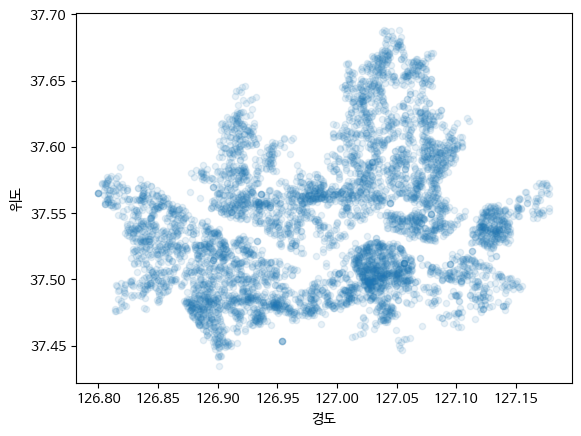

In [ ]:
## 산점도 그래프
df_scatter = df_map.copy()
# df_scatter = df_map['경도']
df_scatter.head()
df_scatter.plot(kind='scatter', x='경도', y='위도', alpha=0.1)

# 결과값 3
# 정렬 순으로 막대 그래프

In [ ]:
# 구별 인구 수 대비 점포 수 비율 불러오기
import pandas as pd
dt = pd.read_csv('/content/drive/MyDrive/프로젝트 23 06/점포 추천 시각화 프로젝트/주민등록인구_오름차순 인구 수 삭제 버전 - 복사본.csv', encoding = 'cp949')
print(dt.head())


   합계 구 이름  점포 수  인구 수 대비 점포 수 비율 
0  합계  은평구   167       2817.976048
1  합계  노원구   199       2552.834171
2  합계  송파구   265       2507.600000
3  합계  양천구   200       2220.050000
4  합계  성북구   200       2209.920000


In [ ]:
dt['구 이름'].tolist()
city_name = dt['구 이름'].tolist()
city_name

['은평구',
 '노원구',
 '송파구',
 '양천구',
 '성북구',
 '동작구',
 '강북구',
 '도봉구',
 '강서구',
 '성동구',
 '중랑구',
 '구로구',
 '종로구',
 '관악구',
 '용산구',
 '마포구',
 '동대문구',
 '강동구',
 '광진구',
 '서대문구',
 '영등포구',
 '서초구',
 '금천구',
 '강남구',
 '중구']

[[Text(0, 0, '은평구'),
  Text(1, 0, '노원구'),
  Text(2, 0, '송파구'),
  Text(3, 0, '양천구'),
  Text(4, 0, '성북구'),
  Text(5, 0, '동작구'),
  Text(6, 0, '강북구'),
  Text(7, 0, '도봉구'),
  Text(8, 0, '강서구'),
  Text(9, 0, '성동구'),
  Text(10, 0, '중랑구'),
  Text(11, 0, '구로구'),
  Text(12, 0, '종로구'),
  Text(13, 0, '관악구'),
  Text(14, 0, '용산구'),
  Text(15, 0, '마포구'),
  Text(16, 0, '동대문구'),
  Text(17, 0, '강동구'),
  Text(18, 0, '광진구'),
  Text(19, 0, '서대문구'),
  Text(20, 0, '영등포구'),
  Text(21, 0, '서초구'),
  Text(22, 0, '금천구'),
  Text(23, 0, '강남구'),
  Text(24, 0, '중구')]]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from current font.
  func(

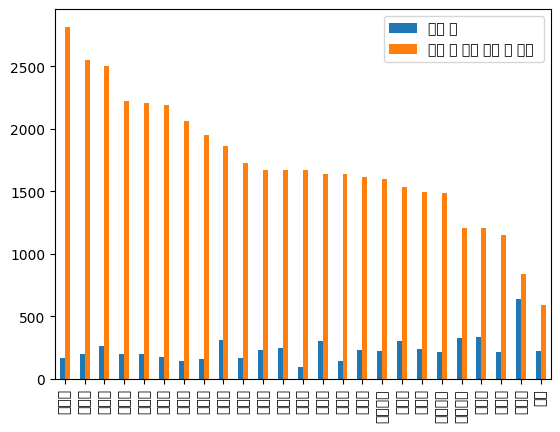

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_plt = dt.plot(kind="bar")

plt.rc('font', family='NanumBarunGothic')
# x 눈금값 이름 변경하기
df_plt.set(xticklabels= city_name )

# ticklabel=city_name
# df_plt.xticks(ticklabel)

#df_plt.set+xticks(city_name)

# 결과값 4
# 상위 8개 지역의 파이 그래프

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

[2817.976048 2552.834171 2507.6      2220.05     2209.92     2193.438202
 2067.375    1950.242236]


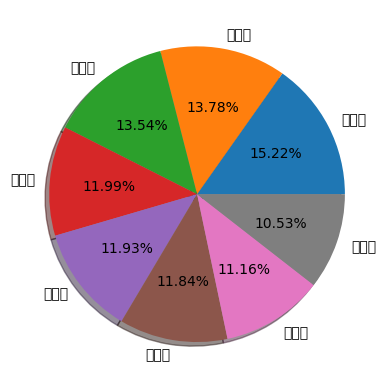

pieG01.png파일이 저장되었습니다.


<Figure size 640x480 with 0 Axes>

In [ ]:
# 파이 그래프
import pandas as pd
import matplotlib.pyplot as plt

str = "/content/drive/MyDrive/프로젝트 23 06/점포 추천 시각화 프로젝트/주민등록인구_오름차순 인구 수 삭제 버전 - 복사본.csv"
df_chart = pd.read_csv(str,encoding='cp949')
# df_chart
# print(df_chart.columns)
df_chart.set_index('구 이름',inplace=True)
df_pie = df_chart.drop(['합계','점포 수'], axis=1)
df_pie = df_pie.sort_values(by='인구 수 대비 점포 수 비율 ',ascending=False)
# df_pie.head()
# df_pie.plot.pie(y='인구 수 대비 점포 수 비율 ', figsize=(9, 9))

df_chart = pd.read_csv(str,encoding='cp949')

mycolors = ['blue', '#6AFF00', 'yellow', '#FF003C', 'green']
# # slice = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# slice = list(range(1, len(df_pie)))
# slice = list(range(1, 6))
slice=df_pie['인구 수 대비 점포 수 비율 '].values[0:8]
print(slice)

gu = df_pie.index[0:8]
plt.pie(x=slice, labels=gu, shadow = True, autopct='%1.2f%%')

plt.show()


# 값이 큰 순으로 시각화 시키기 => 개업 장소 추천
filename = 'pieG01.png'
plt.savefig(filename, dpi=400)
print(filename + '파일이 저장되었습니다.')
plt.show()